<a href="https://colab.research.google.com/github/Sophie1218/HMTK_DS102.L11.CNCL/blob/main/InformationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Bert_Complaint')

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bert_Complaint/Dataset_DL.csv')
df.head()

,ID,Comment,Label,Domain
0,1117661425258766_1117711878587054,Tắt Ai tự động nhận diện ảnh kiểu gì ak,0,Điện thoại
1,1117661425258766_1117711881920387,So sánh với Nokia 8.1,0,Điện thoại
2,1117661425258766_1117712271920348,A51 vs reno 2F máy nào tốt hơn a,0,Điện thoại
3,1117661425258766_1117712698586972,Giật nhỉ :)),1,Điện thoại
4,1117661425258766_1117712938586948,"Mới toang con 7plus,hôm qua ra làm luôn con nà...",1,Điện thoại


In [5]:
#null
df.isnull().sum(axis = 0)

ID         0
Comment    0
Label      0
Domain     0
dtype: int64

In [6]:
def Stat_Domain(x,y):
    sum_1_5 = [0,0,0]
    sum_6_10 = [0,0,0]
    sum_11_15 = [0,0,0]
    sum_16_20 = [0,0,0]
    sum_21_25 = [0,0,0]
    sum_26_30 = [0,0,0]
    sum_up30 = [0,0,0]
    for i in range(len(x)):
        if 1<= len(x[i]) <=5:
            if y[i] == 'Ứng dụng': sum_1_5[0]+=1
            if y[i] == 'Điện thoại': sum_1_5[1]+=1
            if y[i] == 'Mỹ phẩm': sum_1_5[2]+=1
        elif 6<= len(x[i]) <=10:
            if y[i] == 'Ứng dụng': sum_6_10[0]+=1
            if y[i] == 'Điện thoại': sum_6_10[1]+=1
            if y[i] == 'Mỹ phẩm': sum_6_10[2]+=1
                
        elif 11<= len(x[i]) <=15:
            if y[i] == 'Ứng dụng': sum_11_15[0]+=1
            if y[i] == 'Điện thoại': sum_11_15[1]+=1
            if y[i] == 'Mỹ phẩm': sum_11_15[2]+=1

        elif 16<= len(x[i]) <=20:
            if y[i] == 'Ứng dụng': sum_16_20[0]+=1
            if y[i] == 'Điện thoại': sum_16_20[1]+=1
            if y[i] == 'Mỹ phẩm': sum_16_20[2]+=1
    
        elif 21<= len(x[i]) <=25:
            if y[i] == 'Ứng dụng': sum_21_25[0]+=1
            if y[i] == 'Điện thoại': sum_21_25[1]+=1
            if y[i] == 'Mỹ phẩm': sum_21_25[2]+=1
    
        elif 26<= len(x[i]) <=30:
            if y[i] == 'Ứng dụng': sum_26_30[0]+=1
            if y[i] == 'Điện thoại': sum_26_30[1]+=1
            if y[i] == 'Mỹ phẩm': sum_26_30[2]+=1
                
        elif len(x[i])>30:
            if y[i] == 'Ứng dụng': sum_up30[0]+=1
            if y[i] == 'Điện thoại': sum_up30[1]+=1
            if y[i] == 'Mỹ phẩm': sum_up30[2]+=1
    
    data = [['1-5',sum_1_5[0],sum_1_5[1],sum_1_5[2]],
    ['6-10', sum_6_10[0],sum_6_10[1],sum_6_10[2]],
    ['11-15', sum_11_15[0],sum_11_15[1],sum_11_15[2]],
    ['16-20',sum_16_20[0],sum_16_20[1],sum_16_20[2]],
    ['21-25',sum_21_25[0],sum_21_25[1],sum_21_25[2]],
    ['26-30',sum_26_30[0],sum_26_30[1],sum_26_30[2]],
    ['>30',sum_up30[0],sum_up30[1],sum_up30[2]]]
    print (tabulate(data, headers=["Độ dài(từ)", "Ứng dụng", "Điện thoại","Mỹ phẩm"]))


In [7]:
Stat_Domain(df['Comment'],df['Domain'])

Độ dài(từ)      Ứng dụng    Điện thoại    Mỹ phẩm
------------  ----------  ------------  ---------
1-5                    3             0          3
6-10                   8             4         21
11-15                  9            14         22
16-20                 14            23         28
21-25                 28            26         75
26-30                 26            22         81
>30                  512           286       1210


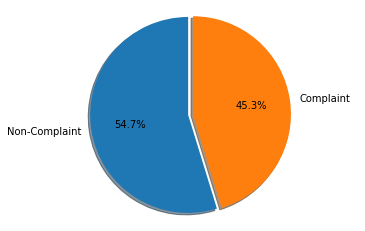

In [8]:
%matplotlib inline
labels = 'Non-Complaint', 'Complaint'

sizes = [df['Label'].value_counts()[0]/len(df['Label']),df['Label'].value_counts()[1]/len(df['Label'])]
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

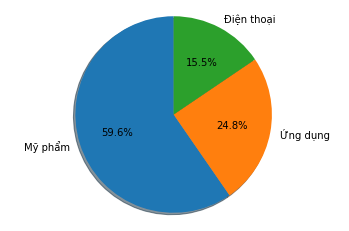

In [9]:
%matplotlib inline
labels = 'Mỹ phẩm', 'Ứng dụng', 'Điện thoại'

sizes = [df['Domain'].value_counts()[0]/len(df['Domain']),df['Domain'].value_counts()[1]/len(df['Domain']),df['Domain'].value_counts()[2]/len(df['Domain'])]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [10]:
def Detail_Domain(x,y,z):
    label_0 = [0,0,0]
    label_1 = [0,0,0]
    for i in range(len(x)):
        if (z[i]) == 'Mỹ phẩm':
            if (y[i]) == 0: label_0[0] += 1
            elif (y[i]) == 1: label_1[0] += 1
        elif (z[i]) == 'Ứng dụng':
            if (y[i]) == 0: label_0[1] += 1
            elif (y[i]) == 1: label_1[1] += 1
        elif (z[i]) == 'Điện thoại':
            if (y[i]) == 0: label_0[2] += 1
            elif (y[i]) == 1: label_1[2] += 1
    
    %matplotlib inline
    labels = ['Mỹ phẩm', 'Ứng dụng', 'Điện thoại' ]

    x = np.arange(len(labels))  
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, label_0, width, label='Non-Complaint')
    rects2 = ax.bar(x + width/2, label_1, width, label='Complaint')

    ax.set_ylabel('The number of Corpus')
    ax.set_xlabel('Domain')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, 1050, 200))
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  #
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

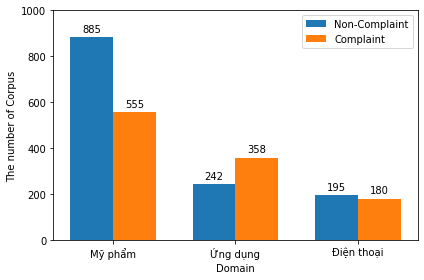

In [11]:
Detail_Domain(df['Comment'],df['Label'],df['Domain'])